In [2]:
import numpy as np
from PIL import Image
import glob
from matplotlib import pyplot as plt

In [64]:
# Normalize the pictures
def normalize(img):
    img = np.array(img)
    img_min = np.min(img)
    img_max = np.max(img)
    img = (img - img_min) / float(img_max - img_min)
    return img
# Calculating mean and standard deviation
def calculate_mean_std(class_list):
    img_size = np.array(class_list[0]).shape
    pixels_list = np.zeros((img_size[0], img_size[1], img_size[2], len(class_list)))
    for i, img in enumerate(class_list):
        for c, channel in enumerate(img):
            for j, row in enumerate(channel):
                for k, pixel in enumerate(row):
                    pixels_list[c][j][k][i]= pixel
    mean = np.zeros((img_size[0], img_size[1], img_size[2]))
    std = np.zeros((img_size[0], img_size[1], img_size[2]))
    for c, channel in enumerate(pixels_list):
        for i, row in enumerate(channel):
            for j, column in enumerate(row):
                mean[c][i][j] = np.mean(pixels_list[c][i][j])
                std[c][i][j] = np.std(pixels_list[c][i][j])
    return mean, std

In [91]:
array = []
#put the class in an array
for x in glob.glob('My_Cars/train\Audi S4 Sedan 2012/*.jpg'):
    im = Image.open(x)
    array.append(im)

In [92]:
resized_imgs = [img.resize((256,256), Image.BILINEAR) for img in array] #resize 
ImagesInClass = [np.array(img) for img in resized_imgs] #change from list of images to list of numpy array
normalized_images = [normalize(ImagesInClass[i]) for i in range(len(ImagesInClass))] #normalize
#print(normalized_images)

In [93]:
mean , std = calculate_mean_std(normalized_images)

Text(0.5, 1.0, 'Uncropped Mean Audi S4 Sedan 2012')

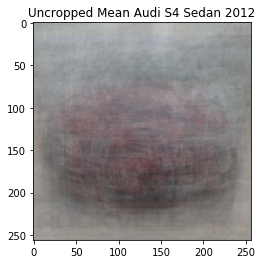

In [94]:
plt.imshow(mean)
plt.title("Uncropped Mean Audi S4 Sedan 2012")

Text(0.5, 1.0, 'Uncropped Std Audi S4 Sedan 2012')

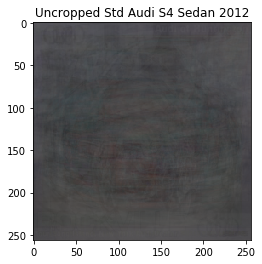

In [95]:
plt.imshow(std)
plt.title("Uncropped Std Audi S4 Sedan 2012")